# ENCLAVE
**ENCLAVE** - _Enclaves, Gated Communities and Deforestation Analysis_ - is a spatial analysis project exploring the relationship between the expansion of gated communities and deforestation in Porto Alegre and Santa Cruz do Sul, Brazil.

## Questions to be answered with data visualization tools

### Question 1. What is the difference in deforestation patterns in urban areas between Santa Cruz do Sul and Porto Alegre?

#### 1.1. Inicial setup and data loading

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set the base path for your processed data
PROCESSED_DATA_PATH = os.path.join(".", "data", "processed")

# Define the file paths for each municipality
scs_file = os.path.join(PROCESSED_DATA_PATH, "scs_mapbiomas_collection90_def_sec_veg_accumulated_v1-deforestation_accumulated_1986_2023_processed.gpkg")
poa_file = os.path.join(PROCESSED_DATA_PATH, "poa_mapbiomas_collection90_def_sec_veg_accumulated_v1-deforestation_accumulated_1986_2023_processed.gpkg")

# Load the processed GeoDataFrames
try:
    scs_deforestation = gpd.read_file(scs_file)
    poa_deforestation = gpd.read_file(poa_file)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Processed data files not found. Please ensure the data processing script has been run and the files exist in the 'data/processed' directory.")
    exit()

# Add a 'city' column to each GeoDataFrame for easy identification
scs_deforestation['city'] = 'Santa Cruz do Sul'
poa_deforestation['city'] = 'Porto Alegre'

# Concatenate the two GeoDataFrames for comparative analysis later
all_deforestation = pd.concat([scs_deforestation, poa_deforestation], ignore_index=True)

Data loaded successfully.


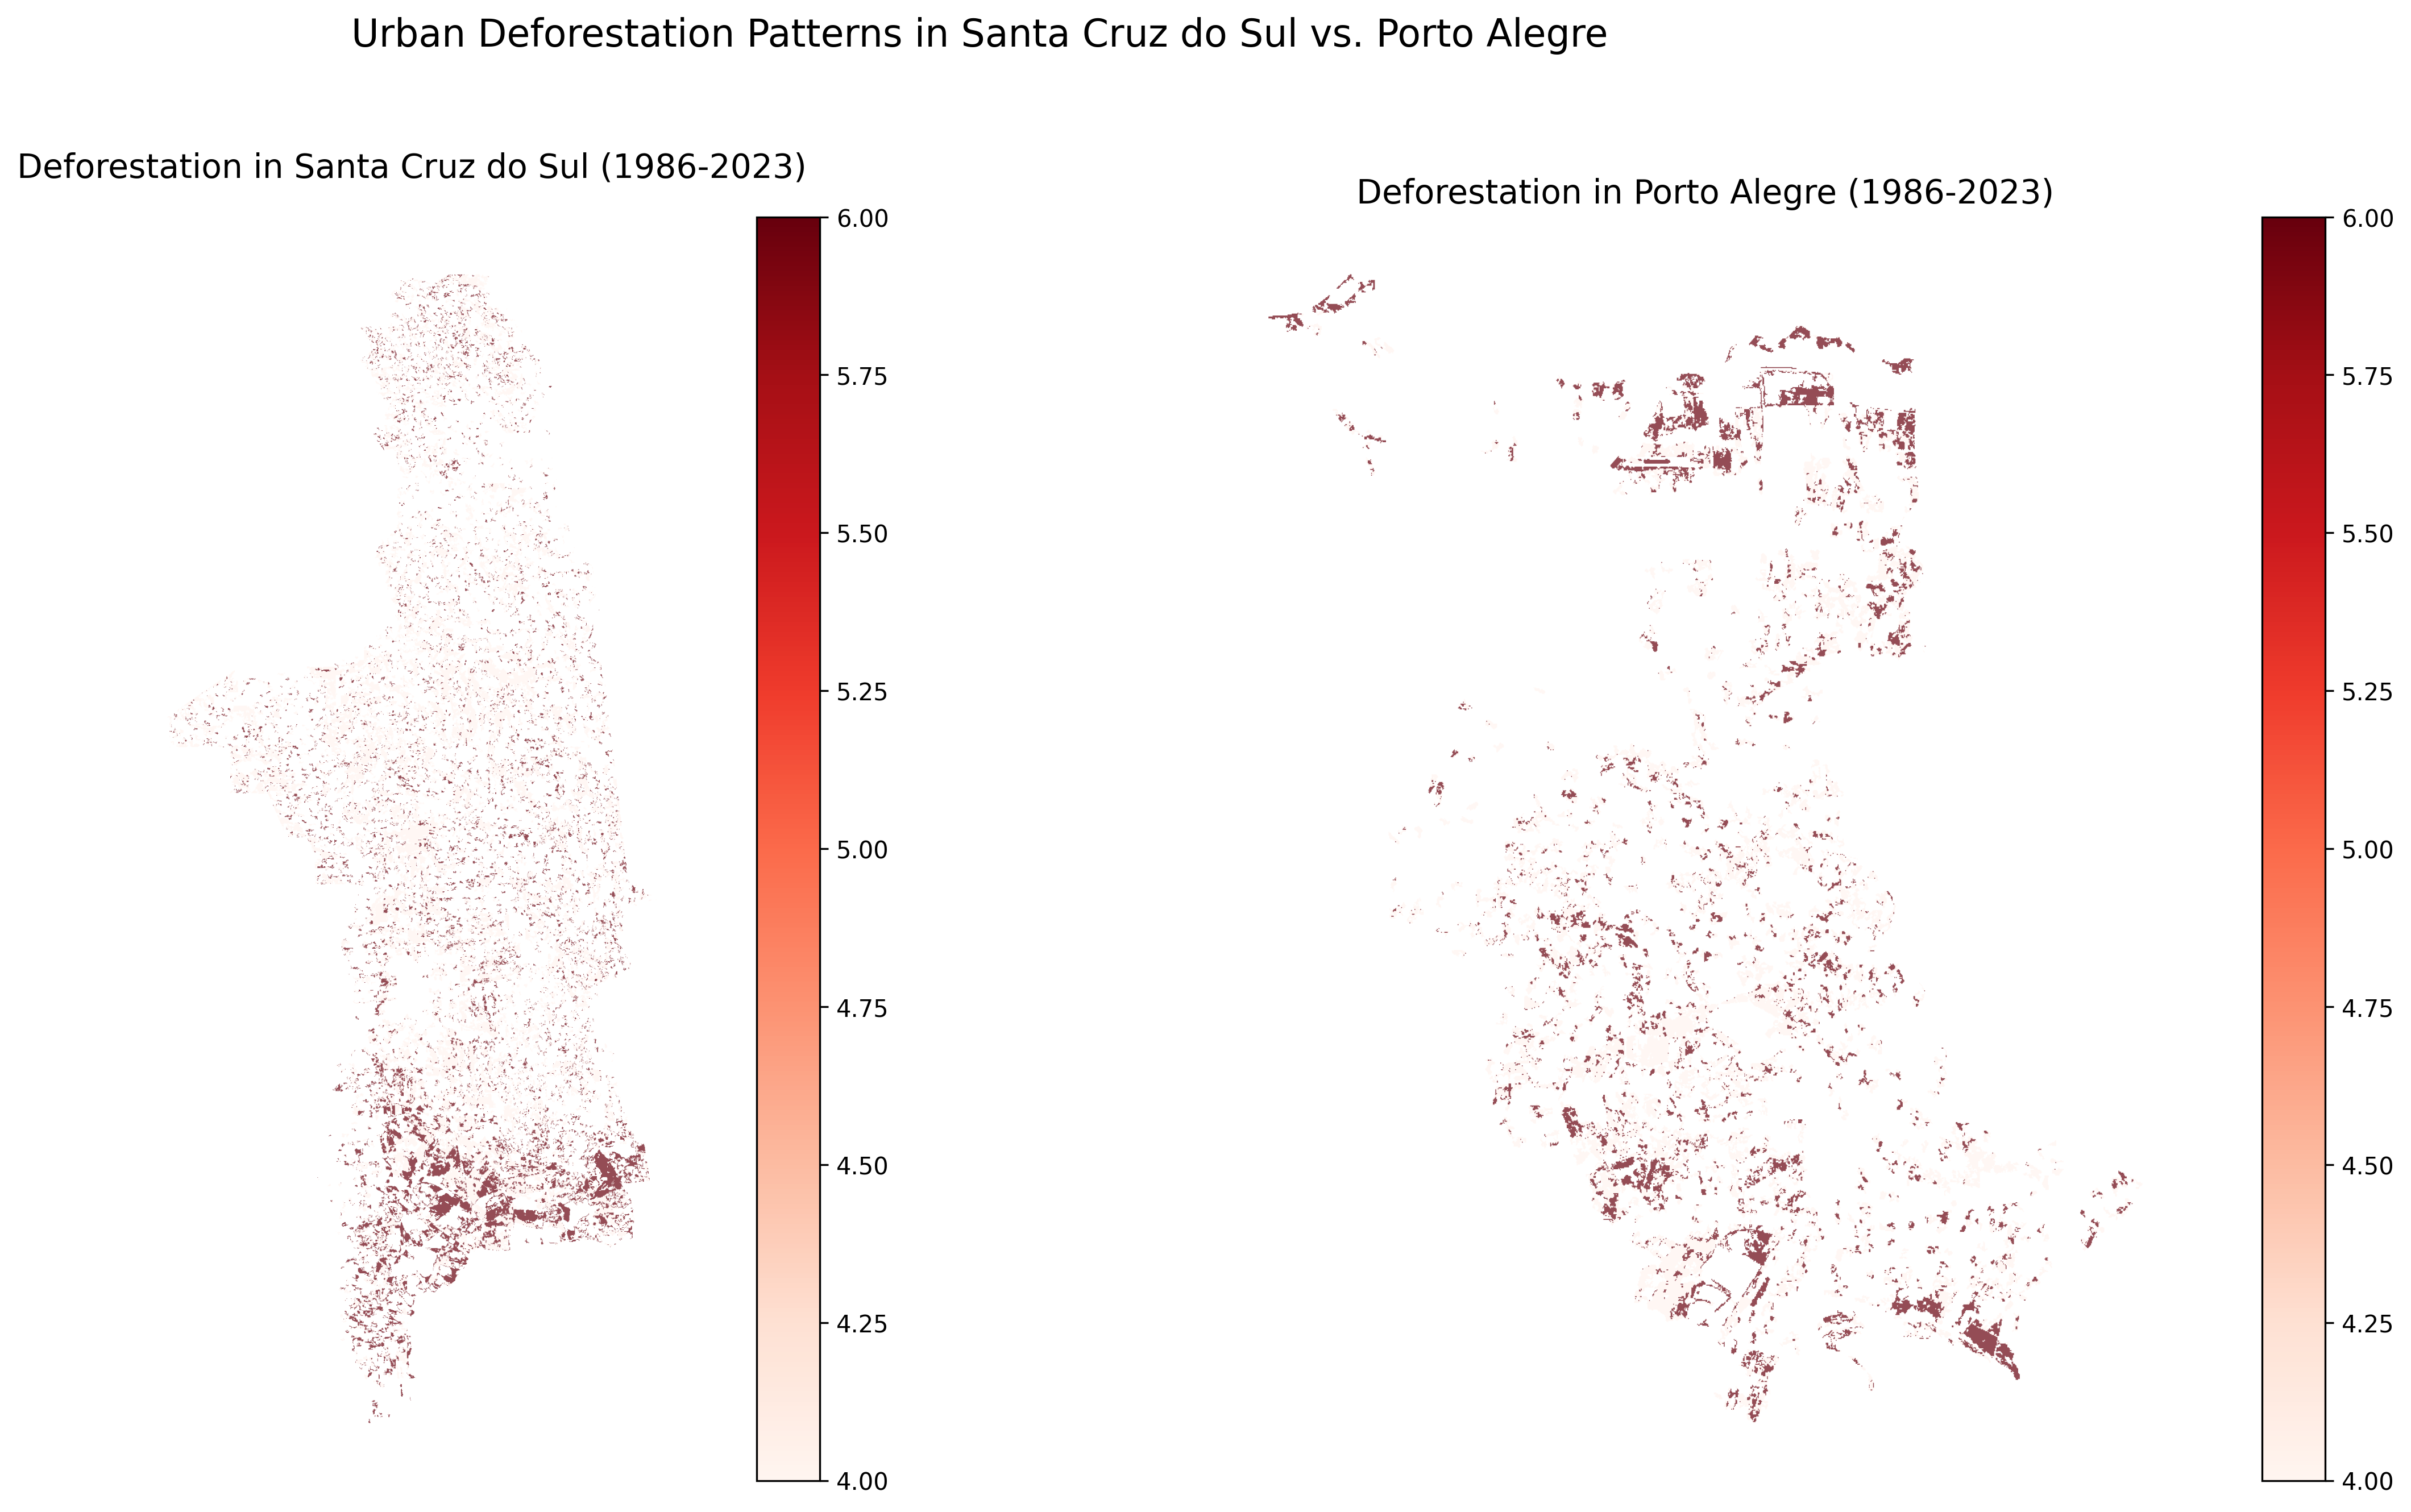

Total deforestation area in Santa Cruz do Sul: 225.78 km²
Total deforestation area in Porto Alegre: 88.37 km²


In [3]:
# Create the maps for each city
fig, axes = plt.subplots(1, 2, figsize=(18, 9), dpi=300)

# Map for Santa Cruz do Sul
scs_deforestation.plot(column='class',
                       ax=axes[0],
                       legend=True,
                       cmap='Reds',
                       alpha=0.7)
axes[0].set_title('Deforestation in Santa Cruz do Sul (1986-2023)', fontsize=14)
axes[0].set_axis_off()

# Map for Porto Alegre
poa_deforestation.plot(column='class',
                       ax=axes[1],
                       legend=True,
                       cmap='Reds',
                       alpha=0.7)
axes[1].set_title('Deforestation in Porto Alegre (1986-2023)', fontsize=14)
axes[1].set_axis_off()

plt.suptitle('Urban Deforestation Patterns in Santa Cruz do Sul vs. Porto Alegre', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print the total area of deforestation for each city
scs_total_area = scs_deforestation['area_sqkm'].sum()
poa_total_area = poa_deforestation['area_sqkm'].sum()

print(f"Total deforestation area in Santa Cruz do Sul: {scs_total_area:.2f} km²")
print(f"Total deforestation area in Porto Alegre: {poa_total_area:.2f} km²")

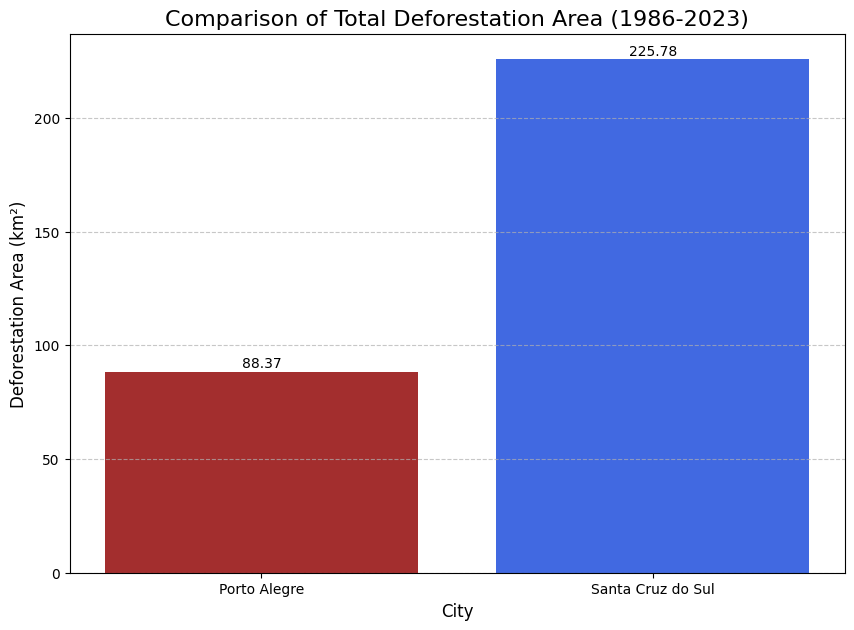

In [4]:
# Group data by city and sum the area
deforestation_by_city = all_deforestation.groupby('city')['area_sqkm'].sum().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 7))
bars = plt.bar(deforestation_by_city['city'], deforestation_by_city['area_sqkm'], color=['#a32e2e', '#4169e1'])

# Add labels and title
plt.title('Comparison of Total Deforestation Area (1986-2023)', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Deforestation Area (km²)', fontsize=12)

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Question 2. What percentage of deforestation is caused by real estate developments (residential gated communities) in each city?

### Question 3. Do the condominiums that deforested the most in both cities have common characteristics?

### Question 4. Interactive map with Folium